<a href="https://colab.research.google.com/github/Anushriya3007/ML-Lab/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RMSE: 2.8929629361570393
R² Score: 0.987738954203157


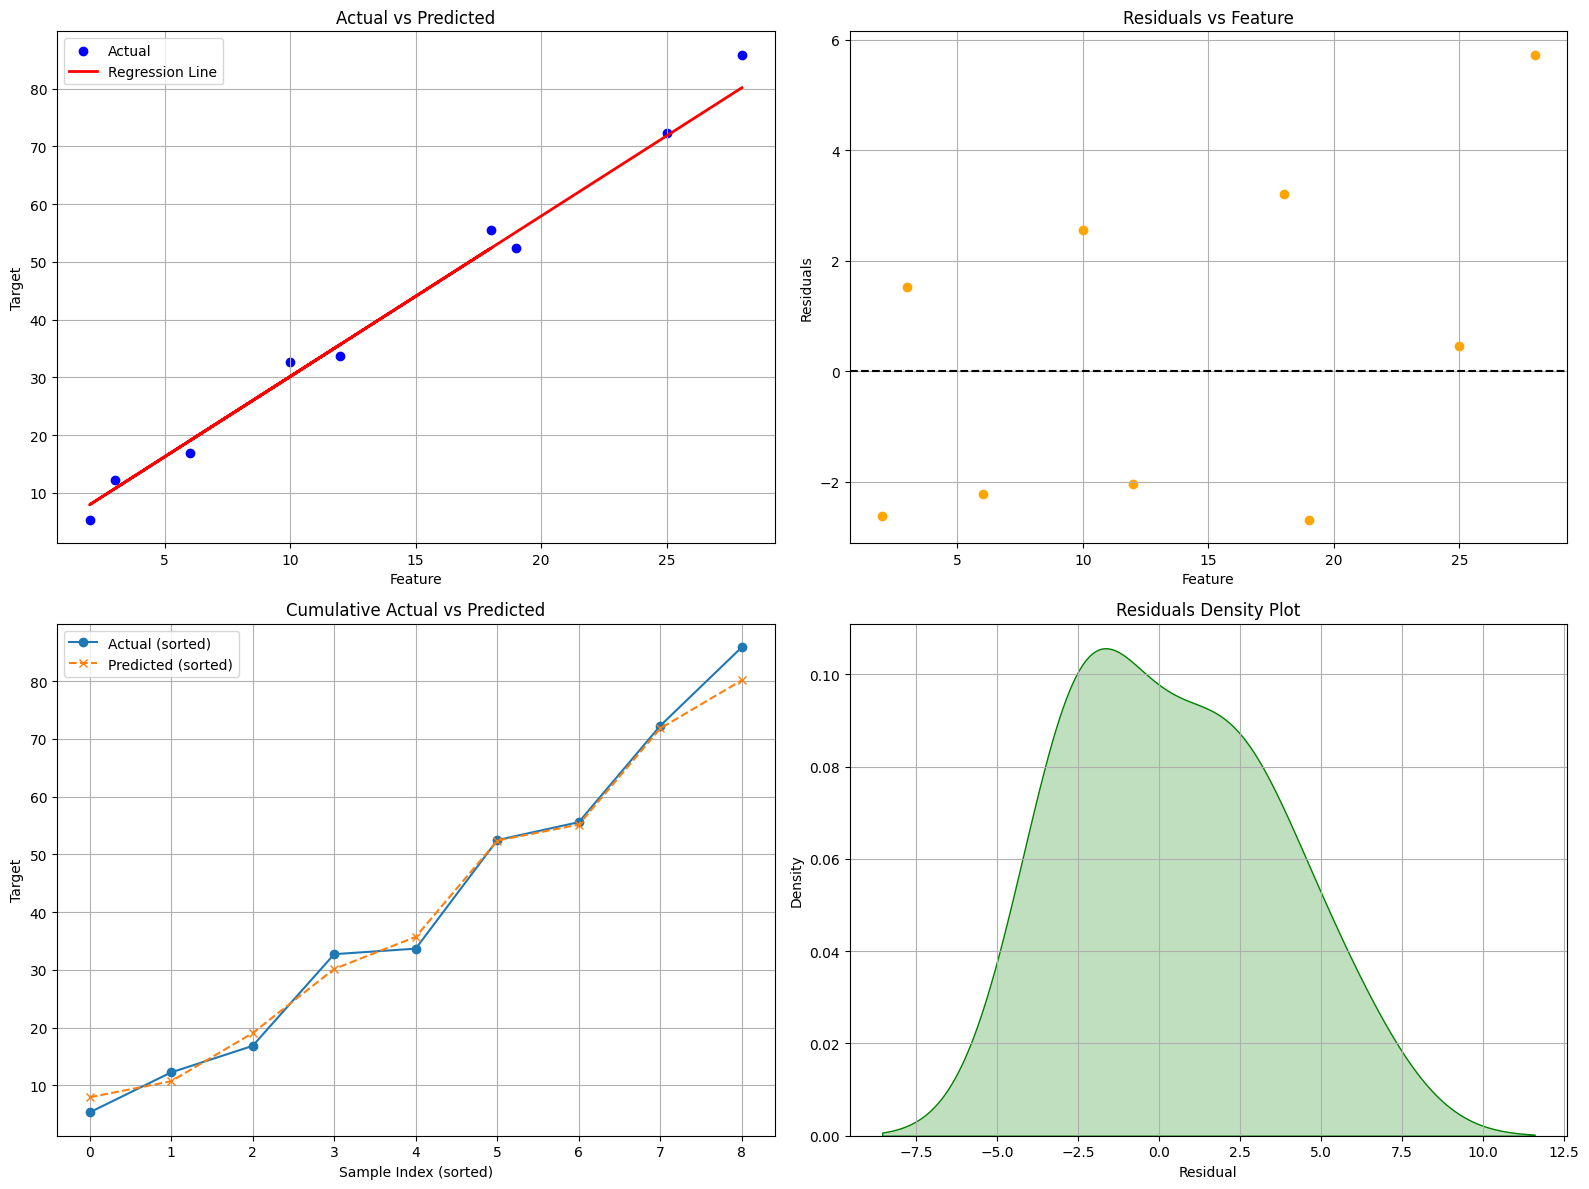

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

np.random.seed(42)
X = np.linspace(1, 30, 30)
y = 3 * X + np.random.normal(0, 5, size=X.shape)
df = pd.DataFrame({'feature': X, 'target': y})

X = df[['feature']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

residuals = y_test - y_pred

plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.scatter(X_test, residuals, color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals vs Feature')
plt.xlabel('Feature')
plt.ylabel('Residuals')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(np.arange(len(y_test)), np.sort(y_test), 'o-', label='Actual (sorted)')
plt.plot(np.arange(len(y_pred)), np.sort(y_pred), 'x--', label='Predicted (sorted)')
plt.title('Cumulative Actual vs Predicted')
plt.xlabel('Sample Index (sorted)')
plt.ylabel('Target')
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
sns.kdeplot(residuals, fill=True, color='green')
plt.title('Residuals Density Plot')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()
